# Definition of the parameters for simulation

First we will compute the Einstein crossing time 
$$ t_E = \frac{\theta_E D_L}{v}$$
where $v$ is the source velocity $D_L$ the distance from the observer to the lens and 
the Einstein radius $$ \theta_E =\sqrt{ \frac{4GM}{c^2}\frac{D_{LS}}{D_{S}D_{L}}}$$
where $D_{LS}$ is the distance from the lens to the source that can be approximated to $D_S - D_L$ in the distances that we are considering.

For sources in the bulge in the area that Roman survey will develope the sources can be as maximum at $D_S=8$ Kpc that is the distance to the galactic center. On the other side the lens which can be a planet or black hole can be at distances ranging from 0 to 8 KPC
A tangential velocities of approximatly 100 km/s are considered for this field https://iopscience.iop.org/article/10.3847/1538-4357/abd181/pdf



In [164]:
# [t0, u0, tE, log_s, log_q, alpha, piEN, piEE]
from astropy import constants as const
from astropy import units as u
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
class point_source(object):
    def __init__(self,flux=1.0,ds=10.0,vel=200.):
        """
        Initialize a point source.
        Parameters:
        - flux: baseline flux
        - ds: source distance
        - ds: source relative velocity
        """
        self.ds=ds
        self.flux=flux
        self.vel=vel

class point_lens(object):
    """
    Initialize a point lens.
    Parameters:
    - ps : point source
    - mass : lens mass
    - dl : lens distance
    - t0 : time of minimal distance from the source
    (magnification peak)
    - y0 : impact parameter
    """
    def __init__(self,ps,mass=1.0,dl=5.0,ds=8.0,t0=0.0,y0=0.1):
        self.M=mass
        self.dl=dl
        self.ps=ps
        self.y0=y0
        self.t0=t0
        self.tE=self.EinsteinCrossTime()

    # a function returning the Einstein radius
    def EinsteinRadius(self):
        mass=self.M*const.M_sun
        G=const.G
        c=const.c
        # conversion factor: radian to arcsec
        aconv=np.rad2deg(1.0)*3600.0*u.arcsecond
        return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(self.ps.ds-self.dl)/self.dl/self.ps.ds/u.kpc))*aconv)

    # a function returning the Einstein radius crossing time
    def EinsteinCrossTime(self):
        theta_e=self.EinsteinRadius()
        return(((theta_e.to('radian').value*self.dl*u.kpc).to('km')/self.ps.vel/u.km*u.s).to('day'))

In [103]:
28*u.au.to('kpc')

1.357478307106701e-07

/tmp/ipykernel_56618/1825514495.py:12: RuntimeWarning: invalid value encountered in multiply
  return(((theta_e.to('radian').value*DL*u.kpc).to('km')/V/u.km*u.s).to('day'))


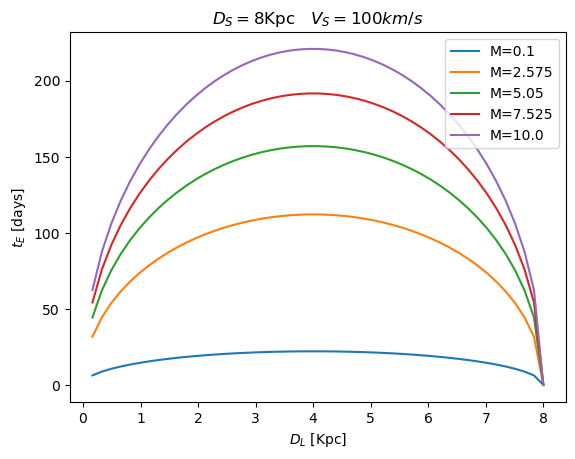

In [65]:
def EinsteinRadius(M,DL,DS):
    mass=M*const.M_sun
    G=const.G
    c=const.c
    # conversion factor: radian to arcsec
    aconv=np.rad2deg(1.0)*3600.0*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)

# a function returning the Einstein radius crossing time
def EinsteinCrossTime(M,DL,DS,V):
    theta_e=EinsteinRadius(M,DL,DS)
    return(((theta_e.to('radian').value*DL*u.kpc).to('km')/V/u.km*u.s).to('day'))


dl = np.linspace(0,8,50)
# print(dl)
# tE = [float(EinsteinCrossTime(2,4,8,50).value) for DL in dl]
m = np.linspace(0.1,10,5)
for i in range(len(m)):
    V = 100
    DS = 8
    plt.plot(dl,EinsteinCrossTime(m[i],dl,DS,V),label = f'M={m[i]}')
    plt.xlabel(r'$D_L$ [Kpc]')
    plt.ylabel(r'$t_E$ [days]')
    plt.title('$D_S = 8$Kpc   $V_S = 100 km/s$')
plt.legend(loc='best')
plt.show()

The stars in the main sequence have masses ranging from 0.1 to 100 solar mases.

The mass of the lens can be for example planets from the mass of Mars to the mass of Jupiter or another star.

The mass of Mars is $0.64169\times 10^{24}kg$ and Jupiter $1.899\times 10^{27} kg$.

The possibles values for $$q=\frac{M_2}{M_1}$$ are listed

The maximum value considered for a source can be for a O-type star of 120 solar masses. 
So for the minimum value for q we can get is $$q=\frac{M_{Mars}}{M_{G0}}$$



The minimum value that can be considered for a source is for an m-dwarf star with 0.57 solar masses.

So the maximum value for q is
be for a system formed by a planet of the mass of the more massive planet ever founded HR 2562 b with 30 times mass of Jupyter and a m-dwarf the less massive type of star of the main sequence $$q=1$$ 


In [3]:
Mars_mass = 0.64169e+24*u.kg # Mars mass in solar mases

Jupiter_mass = 1.899e+27*u.kg # Jupiter mass in solar mases
Mass_G0_max = 1.06*const.M_sun
print(Mass_G0_max)

q_max = 1
q_min = Jupiter_mass/Mass_G0_max
print('The maximum value for q is',q_max)
print('The minimum value for q is',q_min)


2.107714462939934e+30 kg
The maximum value for q is 1
The minimum value for q is 0.0009009759307487933


## The separation between the two lenses

For this we are considering a system conformed with lenses at a given distance DL, and source at a given distance DS. And a total mass M.

The distance separation between the lens we considered that can be as much as 28 AU. So the let's compute the projected separation 
$$s = \frac{\theta_L}{\theta_E}$$ 



In [125]:
def EinsteinRadius(M,DL,DS):
    mass=M*const.M_sun
    G=const.G
    c=const.c
    # conversion factor: radian to arcsec
    aconv=np.rad2deg(1.0)*3600.0*u.arcsecond
    # print(DL-DS)
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc)))#*aconv)

DS = 8
M = 1
dl = np.linspace(0,8,20)
ER = EinsteinRadius(M,dl,DS)
print(ER)

[           inf 2.07530100e-08 1.42611421e-08 1.12965078e-08
 9.47240978e-09 8.18509754e-09 7.20013923e-09 6.40451794e-09
 5.73582896e-09 5.15612680e-09 4.64051412e-09 4.17151197e-09
 3.73596880e-09 3.32314118e-09 2.92324912e-09 2.52597594e-09
 2.11809522e-09 1.67778142e-09 1.15294500e-09 0.00000000e+00]


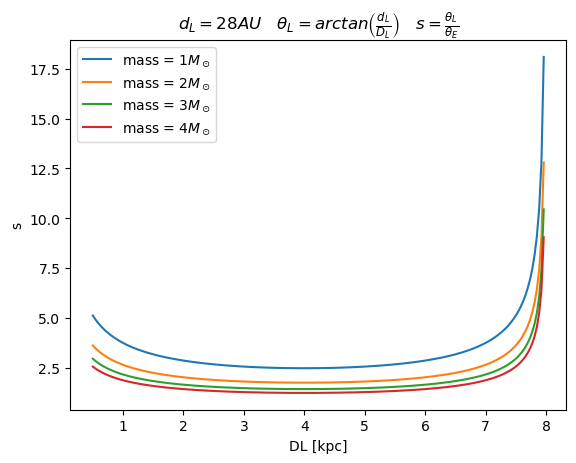

In [162]:
def EinsteinRadius(M,DL,DS):
    mass=M*const.M_sun
    G=const.G
    c=const.c
    # conversion factor: radian to arcsec
    aconv=np.rad2deg(1.0)*3600.0*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)


#for a separation of 28 AU let's compute the angular separation
aconv=np.rad2deg(1.0)*3600.0*u.arcsecond
d = 10*u.au.to('kpc')
dl = np.linspace(0.5,8,200)
# print(dl)
thetaL =np.arctan(d/dl)*aconv
# print(thetaL)
# m = np.linspace(0.1,10,5)

i = 0
V = 100
DS = 8
M = np.arange(1,5,1)
for m in M:
    ER = EinsteinRadius(m,dl,DS)
    # print(ER)
    # print(thetaL/ER)
    plt.plot(dl,thetaL/ER,label=f'mass = {int(m)}'+r'$M_\odot$')
    plt.xlabel('DL [kpc]')
    plt.ylabel('s')
# plt.ylim(0,2)
plt.title(r'$d_L = 28 AU $'+r'   $\theta_L=arctan\left(\frac{d_L}{D_L}\right)$'+r'   $s=\frac{\theta_L}{\theta_E}$')
plt.legend(loc='best')    

## Parallax vector

$$\vec{\pi} = (\pi_{EE},\pi_{EN}) = \frac{\pi_{rel}}{\theta_E}\frac{\vec{\mu}}{\mu}$$


piEE
0.103 ± 0.045 0.089 ± 0.035
0.145 ± 0.004 0.155 ± 0.006
0.1461 0.1430
0.0037 0.0037
0.082 ± 0.013 0.092 ± 0.013
−0.104 ± 0.018 −0.054 ± 0.015
−0.058 ± 0.017 −0.059 ± 0.014 −0.057 ± 0.017 −0.060 ± 0.013
0.105 ± 0.056 0.144 ± 0.058 0.157 ± 0.070 0.124 ± 0.059 0.120 ± 0.065 0.133 ± 0.056
−0.058 ± 0.017 −0.059 ± 0.014 −0.057 ± 0.017 −0.060 ± 0.013
0.152 ± 0.128 −0.049 ± 0.057
0.262 ± 0.015 0.251 ± 0.015
−0.058 ± 0.017 −0.059 ± 0.014 −0.057 ± 0.017 −0.060 ± 0.013
−0.0196 −0.0394


piEN
-0.111 ± 0.084 -0.266 ± 0.149
−0.005 ± 0.005 −0.015 ± 0.002
−0.0055 0.0399
0.0048 0.0052
0.110 ± 0.115 0.020 ± 0.187
−0.785 ± 0.105 0.765 ± 0.097   (OGLE-2018-BLG-0532Lb: Cold Neptune with Possible Jovian Sibling
Yoon-Hyun Ryu1 , Andrzej Udalski2)
−0.055 ± 0.150 −0.066 ± 0.161 −0.060 ± 0.156 −0.019 ± 0.160
−0.278 ± 0.148 0.292 ± 0.170 0.774 ± 0.315 −0.756 ± 0.326 −0.535 ± 0.175 0.504 ± 0.170
−0.055 ± 0.150 −0.066 ± 0.161 −0.060 ± 0.156 −0.019 ± 0.160
0.537 ± 0.440 −0.850 ± 0.590
−0.397 ± 0.040 −0.488 ± 0.044
−0.055 ± 0.150 −0.066 ± 0.161 −0.060 ± 0.156 −0.019 ± 0.160
−0.1759 0.1916

In [4]:
import numpy as np

class binary_lens(object):
    """
    Initialize a binary lens
    """
    def __init__(self,dl=5.0,ds=8,m1=1.0,q=1.0,d=2.0,t0=0.0,y0=0.1, theta=np.pi/4,vrel=50.0):
        # position of the first lens
        self.z1=complex(d/2.0,0.0)
        self.q=q
        self.dl=dl
        self.ds=ds
        # mass of the second lens
        m2=m1/q
        self.mtot=m1+m2
        # store masses in units of the total mass
        self.m1=m1/self.mtot
        self.m2=m2/self.mtot

        """
        we build a point_lens to compute the Einstein radius
        and the Einstein crossing time. This requires defining a
        point source too.
        """
        ps = point_source(ds=ds,vel=vrel)
        pl = point_lens(ps=ps, mass=m1+m2, dl=dl)
        self.thetaE=pl.EinsteinRadius()
        self.tE=pl.EinsteinCrossTime()
        self.t0=t0
        self.y0=y0
        self.theta=theta

    def CritCau(self,ncpt=10000):
        # set the phase vector
        phi_=np.linspace(0,2.*np.pi,ncpt)

        x=[]
        y=[]
        xs=[]
        ys=[]
        # we need to find the roots of our fourth order polynomial
        # for each value of phi
        for i in range(phi_.size):
            phi=phi_[i]
            # the coefficients of the complex polynomial
            coeff = [1.0,0.0,-2*np.conj(self.z1)**2-np.exp(1j*phi),
            -np.conj(self.z1)*2*(self.m1-self.m2)*np.exp(1j*phi),
            np.conj(self.z1)**2*(np.conj(self.z1)**2-np.exp(1j*phi))]
            # use the numpy function roots to find the roots of the
            # polynomial
            z=np.roots(coeff) # these are the critical points!

            # use the lens equation (complex form) to map the critical
            # points on the source plane
            zs=z-self.m1/(np.conj(z)-np.conj(self.z1))\
            -self.m2/((np.conj(z)-np.conj(-self.z1))) # these are the
            # caustics!
            # append critical and caustic points
            x.append(z.real)
            y.append(z.imag)
            xs.append(zs.real)
            ys.append(zs.imag)
        return(np.array(x),np.array(y),np.array(xs),np.array(ys))

    def Images(self,ys1,ys2):
        # complex coordinate of the source
        zs=ys1+1j*ys2
        # coefficients of polynomial eq.
        m=0.5*(self.m1+self.m2)

        Dm=(self.m2-self.m1)/2.0
        c5=self.z1**2-np.conj(zs)**2
        c4=-2*m*np.conj(zs)+zs*np.conj(zs)**2\
        -2*Dm*self.z1-zs*self.z1**2
        c3=4.0*m*zs*np.conj(zs)+4.0*Dm*np.conj(zs)*self.z1\
        +2.0*np.conj(zs)**2*self.z1**2-2.0*self.z1**4
        c2=4.0*m**2*zs+4.0*m*Dm*self.z1\
        -4.0*Dm*zs*np.conj(zs)*self.z1\
        -2.0*zs*np.conj(zs)**2\
        *self.z1**2+4.0*Dm*self.z1**3\
        +2.0*zs*self.z1**4
        c1=-8.0*m*Dm*zs*self.z1\
        -4.0*Dm**2*self.z1**2\
        -4.0*m**2*self.z1**2\
        -4.0*m*zs*np.conj(zs)*self.z1**2\
        -4.0*Dm*np.conj(zs)*self.z1**3\
        -np.conj(zs)**2*self.z1**4\
        +self.z1**6

        c0=self.z1**2*(4.0*Dm**2*zs\
        +4.0*m*Dm*self.z1\
        +4.0*Dm*zs*np.conj(zs)*self.z1+\
        2.0*m*np.conj(zs)*self.z1**2\
        +zs*np.conj(zs)**2*self.z1**2\
        -2*Dm*self.z1**3-zs*self.z1**4)
        coefficients=[c5,c4,c3,c2,c1,c0]
        # solutions of the lens equation
        images=np.roots(coefficients)
        # drop spurious solutions
        z2=-self.z1
        deltazs=zs-(images-self.m1/(np.conj(images)-np.conj(self.z1))
        -self.m2/(np.conj(images)-np.conj(z2)))
        return (np.array([images.real[np.abs(deltazs)<1e-3]]), np.array([images.imag[np.abs(deltazs)<1e-3]]))

    def SourcePos(self,t):
        p=(t-self.t0)/self.tE.value
        zreal=np.cos(self.theta)*p-np.sin(self.theta)*self.y0
        zimag=np.sin(self.theta)*p+np.cos(self.theta)*self.y0
        return(zreal,zimag)

    def detA(self,z):
        z2=-self.z1
        deta=1-np.abs(self.m1/(np.conj(z)-
        np.conj(self.z1))**2+
        self.m2/(np.conj(z)-np.conj(z2))**2)
        return(deta)

    def Magnification(self,t):
        ys1,ys2=self.SourcePos(t)
        xi1,xi2=self.Images(ys1,ys2)
        images=xi1+1j*xi2
        mu=1.0/self.detA(images)
        return(np.abs(mu).sum())

    def LightCurve(self,times):
        p=(times-self.t0)/self.tE.value
        mu=[]
        for t in times:
            mu.append(self.Magnification(t))
        return(p,mu)

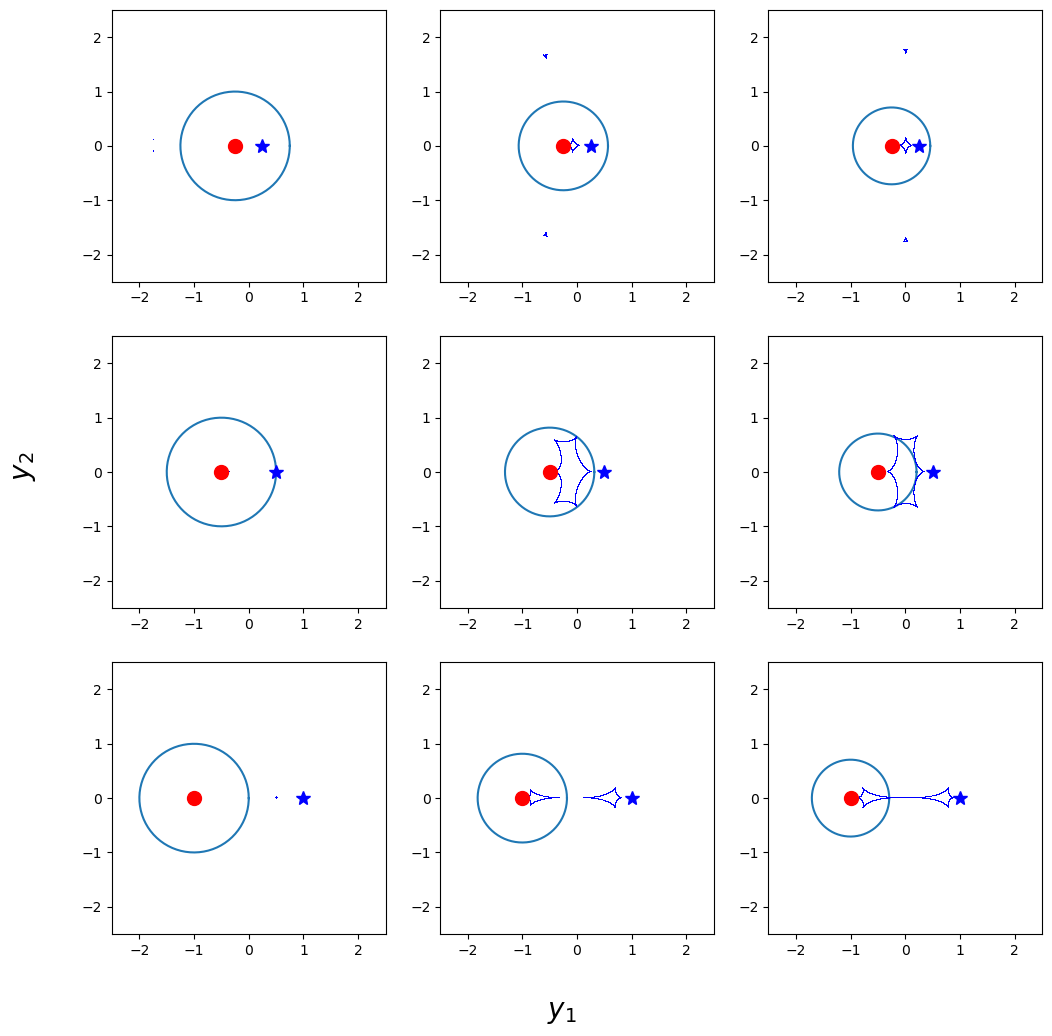

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Parameters
M1 = 1.0
DL = 5.0
DS = 8.0

S = [0.5,1,2]
Q_ = [q_min.value,0.5,1]
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

for i in range(3):
    for j in range(3):
        s = S[i]
        Q = Q_[j]
        bl = binary_lens(m1=M1, q=Q, d=S[i], t0=0.0, y0=0.25, theta=np.pi/4. * 3.0)
        x1, x2, xs1, xs2 = bl.CritCau()

        einstein_radius_m2 = EinsteinRadius(M1 / Q, DL, DS) / bl.thetaE

        angle = np.linspace(0, 2 * np.pi, 150)
        a = einstein_radius_m2 * np.cos(angle)
        b = einstein_radius_m2 * np.sin(angle)
        x0 = -s / 2
        y0 = 0

        ax[i, j].plot(a + x0, b + y0)
        ax[i, j].set_ylim(-2.5, 2.5)
        ax[i, j].set_xlim(-2.5, 2.5)
        ax[i, j].plot(xs1, xs2, ',', color='blue')
        ax[i, j].plot(-s / 2, 0, 'o', markersize=10, color='red')
        ax[i, j].plot(s / 2, 0, '*', markersize=10, color='blue')
#         axins = ax[i,j].inset_axes([0.6, -0.001, 0.4, 0.3])
#         # axins = zoomed_inset_axes(ax[i, j], zoom=0.4, loc='upper right')
#         axins.plot(xs1, xs2, ',', color='blue')
#         x1, x2, y1, y2 = 0.4, 0.6, -0.02, 0.02
#         axins.set_xlim(x1, x2)
#         axins.set_ylim(y1, y2)
#         axins.set_facecolor('white')

#         mark_inset(ax[i, j], axins, loc1=2, loc2=1, fc="none", lw=0.5, ec='black')

#         axins.set_xticklabels([])
#         axins.set_yticklabels([])

fig.text(0.5, 0.04, '$y_1$', ha='center', fontsize=20)
fig.text(0.04, 0.5, '$y_2$', va='center', rotation='vertical', fontsize=20)

# plt.tight_layout()
plt.show()
